In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import MaxNLocator

In [2]:
seismic_file = './hypo71.dat'
x = pd.read_csv(seismic_file, delim_whitespace=True, dtype=object)

In [3]:
x['datetime'] = x['yyyymmdd'] + 'T' + \
            x['HHMM'].str.slice(start=0, stop=2) + ':' + \
            x['HHMM'].str.slice(start=2)

x['datetime'] = pd.to_datetime(x['datetime'].values)
x.index = x['datetime']

In [4]:
seis_times = list(pd.to_datetime(x['datetime'].values))
seis_mag = list(x['MW'].values)

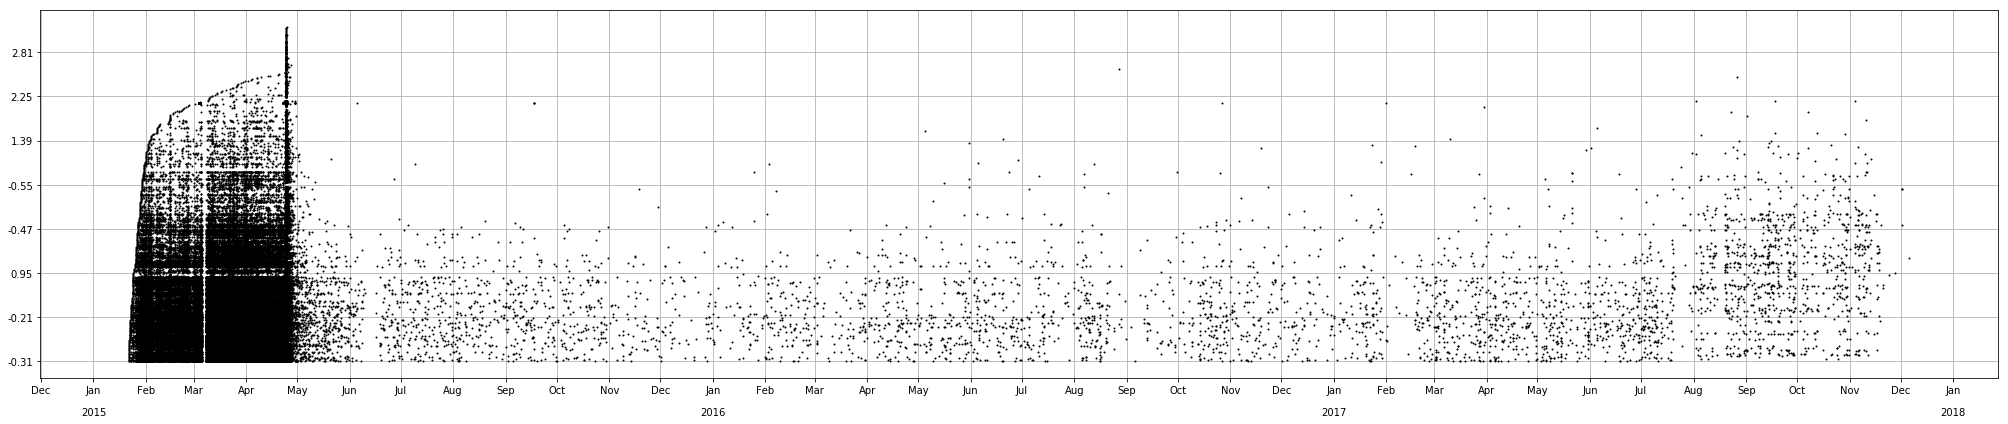

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(28, 6)

plt.plot(seis_times,seis_mag, linestyle='None', marker='o', markersize=1, color='black')

years = dates.YearLocator()
months = dates.MonthLocator()
yearsFmt = dates.DateFormatter('\n\n%Y')
monthsFmt = dates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_minor_formatter(yearsFmt)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.grid()
plt.tight_layout()
plt.show()
